In [1]:
# Dependencies
import numpy as np
import pandas as pd 

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [4]:
#see column headers for measurement/ station table 
engine.execute("select * from measurement").keys()
engine.execute("select * from station").keys()

RMKeyView(['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])

## D1: Determine the Summary Statistics for June

In [24]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 6)

In [6]:
#  3. Convert the June temperatures to a list.
june_temps_list = [temp.tobs for temp in june_temps]
print(np.mean(june_temps_list))

74.94411764705882


In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temps_list, columns=["temps"])

In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 12)

In [10]:
# 7. Convert the December temperatures to a list.
dec_temps_list = [temp.tobs for temp in dec_temps]
print(np.mean(dec_temps_list))

71.04152933421226


In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame (dec_temps_list, columns =["temps"])
dec_df

,temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
#see first and last data entry and counts by station 
session.query(Measurement.station, func.min(Measurement.date), func.max(Measurement.date), func.count(Measurement.station)).\
    group_by(Measurement.station).all()

[('USC00511918', '2010-01-01', '2015-10-30', 1979),
 ('USC00513117', '2010-01-01', '2017-07-31', 2709),
 ('USC00514830', '2010-03-01', '2017-08-23', 2202),
 ('USC00516128', '2010-01-01', '2017-08-23', 2612),
 ('USC00517948', '2010-05-03', '2017-07-31', 1372),
 ('USC00518838', '2010-01-01', '2015-11-20', 511),
 ('USC00519281', '2010-01-01', '2017-08-18', 2772),
 ('USC00519397', '2010-01-01', '2017-08-23', 2724),
 ('USC00519523', '2010-01-01', '2017-08-23', 2669)]

In [15]:
#show min and max and mean tob by station 
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
group_by(Measurement.station).all()

[('USC00511918', 53.0, 87.0, 71.61596766043456),
 ('USC00513117', 59.0, 85.0, 72.68918420081211),
 ('USC00514830', 58.0, 85.0, 74.8732970027248),
 ('USC00516128', 58.0, 84.0, 70.91500765696784),
 ('USC00517948', 58.0, 87.0, 74.68440233236151),
 ('USC00518838', 58.0, 83.0, 72.72407045009784),
 ('USC00519281', 54.0, 85.0, 71.66378066378067),
 ('USC00519397', 56.0, 87.0, 74.55323054331865),
 ('USC00519523', 56.0, 85.0, 74.5436493068565)]

In [22]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates. Let's look at only the most recent year grouped by station. 
def calc_temps(start_date, end_date):
    return session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
            filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.station).all()
results = (calc_temps('2017-01-01','2017-12-31'))
most_recent_year_df = pd.DataFrame(results, columns=['station','min', 'max', 'mean'])
most_recent_year_df

,station,min,max,mean
0,USC00513117,61.0,82.0,72.485849
1,USC00514830,63.0,83.0,76.943590
2,USC00516128,58.0,82.0,72.045045
3,USC00517948,62.0,87.0,74.056075
4,USC00519281,59.0,83.0,72.144796
5,USC00519397,60.0,87.0,74.926087
6,USC00519523,60.0,85.0,76.728571


<AxesSubplot:xlabel='date'>

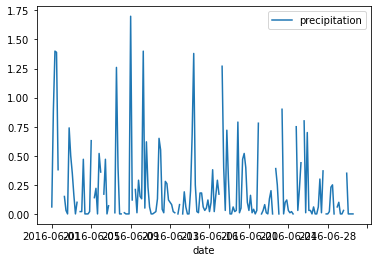

In [38]:
#Precipitation Day over Day month of June 2016 
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).filter(Measurement.date >= '2016-06-01').filter(Measurement.date <= '2016-06-31')
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
# Sort the dataframe by date
df = df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

<AxesSubplot:xlabel='date'>

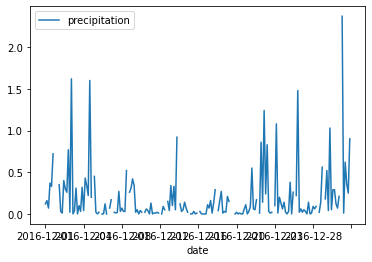

In [39]:
#Precipitation Day over Day month of Dec 2016
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).filter(Measurement.date >= '2016-12-01').filter(Measurement.date <= '2016-12-31')
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
# Sort the dataframe by date
df = df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()